# Springboard Data Storytelling Project

<img src="USA7s_champs.JPG" alt="USA7s"/>  
## Analysis of USA 7s Team Performance, 2017-18

For this project, I will be analyzing the USA 7s team performance in the 2017-18 [HSBC World Rugby Sevens Series](https://www.world.rugby/sevens-series) ("World Series"). The World Series is a tournament consisting of 10 tournaments around the globe. Each team plays 5-6 matches in a tournament, and points are awarded based on a team's finishing place. The top-placed team in each tournament is the winner of the Cup Final, and the team with the total cumulative points from all ten tournaments is crowned the overall [Series champion](https://www.world.rugby/sevens-series/series-info).

In the Capstone 1 project, a Random Forest model was built from the USA's matches on the World Series from the 2015-16 season through the 2017-18 season. The Random Forest model provides a ["feature importance"](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_) attribute, which returns an array of each feature’s importance in the model. I'll be looking at the top five most important features in the model, and looking at their relationship to the USA's performance in these areas during the most recent full season (2017-18).

I'll also look at how these important features hold up in the the first two tournaments of the 2018-19 World Series. I will analysze how the USA performed in the match statistics/features deemed important by the model, and how that performance translated into wins and losses.

Ultimately, I will be analyzing whether the features produced by the "feature importance" attribute can be used as a strong predictor of match outcomes on a macro level - across the 2017-18 Series, and on a micro level - in individual matches.

## USA 7s 2017-18 World Series Overall Results
    
In the 2017-18 World Series, the USA finished the Series in 6th place - their best finish ever, winning one tournament in the Series in Las Vegas. Overall, the USA had a record of 33-22-4 in the 2017-18 season.

**Scoring**

In their 33 wins, the USA had a mean score of 29.24 points for and 10.70 points against, and 4.58 tries for and 1.73 against.

In the USA's 22 losses, the USA had a mean score of 11.86 points for and 25.68 points against, and 1.86 tries for and 4.05 against.

In [237]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# Show plots inline
%matplotlib inline

# set option to NOT truncate columns in DF display
pd.set_option('display.max_columns', None)
# disable copy/slice dataframe warning
pd.options.mode.chained_assignment = None  # default='warn'

## 2017-18 World Series Data Set
First, I will be analyzing the USA 7s matches for the 2017-2018 World Series.  The 2017-18 World Series data was cleaned and processed during the work for the Capstone 1 project. The dataframe contains the match statistics for the USA and for their opponents.

In [238]:
df = pd.read_csv('data/all_USA_2017-18_matches_result.csv')
df.head()

,Team,Opposition,MatchID,Date,Tournament,TotalPoints,Scores,Conversions,Total PointsConceded,Tries,Total Tries Conceded,Try Scoring Rate(1 every x secs),Try Conceding Rate(1 every x secs),Tries Scored Build-Up(No Ruck/Maul),Tries Conceded Build-Up(No Ruck/Maul),Opp22m Entries,Opp22m Entry Rate (1 every x secs),Own22m Entries,Own22m Entry Rate(1 every x secs),Tries Scored per Opp22m Entry,Tries Conceded per Own22m Entry,Possession Time,Possession Time(Opp),Passes,Passing Rate(1 every x secs),Rucks Attack,Rucking Rate Attack (secs),Defensive Rucks,% Ruck Success Own,Own Rucks Won per Match,% Ruck Success Opp,Opp Rucks Won per Match,Turnovers Won,Turnovers Conceded,Turnover Differential,Own Contestable Restarts,Own Contestable Restarts Regained,Contestable_Restart_Win_Pct,Opp Contestable Restarts,Opp Contestable Restarts Received,Total Scrums Own Feed,Scrum Success Own Feed,Scrum_Win_Pct,Total Lineouts Own Throw,Lineout Success Own Throw,Lineout_Win_Pct,Penalty/FK Conceded,Ruck-Maul Penalties Conceded,Yellow_Red Cards,Result
0,Argentina,USA,2,12/2/17,2017-18_Dubai_7s,36,22,0.25,14,4,2,43,86,1,0,6,28.5,2,85.5,0.666666667,1,171,172,22,7.8,9,19.0,10,1.000000,9,0.100000,1,2,1,1,1,0,0.000000,3,2,2,2,1.0,4,4,1.0,1,1,0,1
1,Canada,USA,14,12/2/17,2017-18_Dubai_7s,15,10,0.00,5,2,1,204,220,0,0,7,58.4,2,204.2,0.285714286,0.5,408,220,72,5.7,32,12.8,12,0.937500,30,0.083333,1,8,3,5,2,1,50.000000,2,1,3,3,1.0,2,2,1.0,2,2,0,1
2,New Zealand,USA,39,12/2/17,2017-18_Dubai_7s,34,22,0.25,12,4,2,49,104,3,1,4,48.9,3,65.1,1,0.666666667,195,207,33,5.9,7,27.9,11,0.857143,6,0.090909,1,6,3,3,3,1,33.333333,3,1,0,0,0.0,1,0,0.0,4,2,0,1
3,Samoa,USA,45,12/2/17,2017-18_Dubai_7s,40,26,0.75,14,4,2,57,75,1,0,6,37.9,5,45.5,0.666666667,0.4,227,149,39,5.8,8,28.4,8,1.000000,8,0.250000,2,4,1,3,4,1,25.000000,3,2,1,1,1.0,2,2,1.0,0,0,0,1
4,USA,Argentina,2,12/2/17,2017-18_Dubai_7s,36,14,1.00,22,2,4,86,43,0,1,2,86.1,6,28.7,1,0.666666667,172,171,28,6.1,10,17.2,9,0.900000,9,0.000000,0,1,2,-1,3,1,33.333333,1,1,0,0,0.0,0,0,0.0,3,3,0,0


In [239]:
# Clean up and wrangle data a bit more, including subsetting the data for USA matches.
# Strip underscores from tournament name for better looking labels
df['Tournament'] = df['Tournament'].str.replace("_"," ")
#df.head()

In [240]:
# df of only USA matches
usa = df[(df['Team'] == 'USA')]

## 2017-18 Series Descriptive Statistics for USA's Matches

In [241]:
#Examine the descriptive statistics for only USA matches
usa.describe()

,MatchID,TotalPoints,Scores,Conversions,Total PointsConceded,Tries,Total Tries Conceded,Try Scoring Rate(1 every x secs),Try Conceding Rate(1 every x secs),Tries Scored Build-Up(No Ruck/Maul),Tries Conceded Build-Up(No Ruck/Maul),Opp22m Entries,Opp22m Entry Rate (1 every x secs),Own22m Entries,Own22m Entry Rate(1 every x secs),Possession Time,Possession Time(Opp),Passes,Passing Rate(1 every x secs),Rucks Attack,Rucking Rate Attack (secs),Defensive Rucks,% Ruck Success Own,Own Rucks Won per Match,% Ruck Success Opp,Opp Rucks Won per Match,Turnovers Won,Turnovers Conceded,Turnover Differential,Own Contestable Restarts,Own Contestable Restarts Regained,Contestable_Restart_Win_Pct,Opp Contestable Restarts,Opp Contestable Restarts Received,Total Scrums Own Feed,Scrum Success Own Feed,Scrum_Win_Pct,Total Lineouts Own Throw,Lineout Success Own Throw,Lineout_Win_Pct,Penalty/FK Conceded,Ruck-Maul Penalties Conceded,Yellow_Red Cards,Result
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,30.000000,39.152542,22.186441,0.686239,16.966102,3.474576,2.694915,85.491525,71.152542,1.525424,1.423729,4.898305,55.881356,3.932203,81.423729,229.084746,182.440678,37.203390,6.545763,10.355932,25.377966,8.508475,0.878939,9.135593,0.169489,1.389831,3.779661,4.406780,-0.627119,3.372881,1.576271,44.188862,2.576271,1.864407,1.016949,1.000000,0.621469,1.898305,1.711864,0.836158,2.576271,1.491525,0.101695,0.694915
std,17.175564,8.940056,10.331530,0.293777,9.316219,1.579567,1.441434,56.175333,43.564385,1.291296,1.220562,1.854119,39.204673,1.901582,69.024449,46.025963,47.753776,11.505291,1.777961,3.735952,12.370670,4.617705,0.117286,3.486217,0.134188,1.144958,1.781783,2.305306,2.671034,1.530138,1.147762,29.540792,1.588790,1.209982,0.991194,0.964901,0.485252,1.077912,1.083590,0.327889,1.763650,1.356630,0.304841,0.594638
min,1.000000,15.000000,5.000000,0.000000,0.000000,1.000000,0.000000,30.000000,0.000000,0.000000,0.000000,1.000000,22.500000,0.000000,0.000000,137.000000,92.000000,12.000000,3.800000,2.000000,13.900000,1.000000,0.500000,1.000000,0.000000,0.000000,0.000000,1.000000,-8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.500000,34.000000,14.000000,0.500000,12.000000,2.000000,2.000000,51.000000,46.000000,1.000000,1.000000,4.000000,38.350000,2.000000,36.100000,197.000000,155.000000,28.500000,5.450000,8.000000,18.750000,6.000000,0.806250,7.000000,0.029412,0.500000,3.000000,2.000000,-3.000000,2.000000,1.000000,33.333333,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,30.000000,40.000000,22.000000,0.714286,14.000000,4.000000,2.000000,71.000000,65.000000,1.000000,1.000000,5.000000,46.500000,4.000000,56.300000,224.000000,176.000000,37.000000,6.200000,10.000000,21.700000,8.000000,0.900000,9.000000,0.153846,1.000000,4.000000,5.000000,-1.000000,3.000000,2.000000,50.000000,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000
75%,44.500000,45.000000,28.000000,1.000000,24.000000,4.500000,4.000000,92.500000,87.500000,2.000000,2.000000,6.000000,65.150000,6.000000,100.650000,265.000000,210.500000,43.500000,7.200000,13.000000,26.550000,10.000000,1.000000,11.000000,0.267857,2.000000,5.000000,6.000000,1.000000,4.000000,2.000000,66.666667,4.000000,3.000000,2.000000,2.000000,1.000000,2.500000,2.000000,1.000000,4.000000,2.000000,0.000000,1.000000
max,59.000000,59.000000,47.000000,1.000000,35.000000,7.000000,5.000000,312.000000,225.000000,5.000000,5.000000,10.000000

## Feature Importance
In the modelling of the [Random Forest model](https://github.com/chudzikr/Springboard_Capstone1/blob/master/code/Model_Eval_RF.ipynb) that was built from the USA's match data from 2015 - 2018, the Feature Importance ('feature_importances_') was extracted from the model.

Let's look at the top five important features and see how the USA performed in these areas of the game during the 2017-18 World Series.


| Feature | Importance |
| --- | --- |
|Poss_Time_Diff | 0.259110 |
|PenFK_Against_Diff | 0.170337 |
|Contestable_KO_Win_pct_Diff  |  0.140098  |
|Passes_Diff | 0.126238  |
|Ruck_Win_pct_Diff | 0.115913 |

In [242]:
#Select subset of the most important features from RF model from USA matches
#Poss_Time_Diff, PenFK_Against_Diff, Contestable_KO_Win_pct_Diff, Passes_Diff, Ruck_Win_pct_Diff 
impt_feat = usa[['MatchID','Opposition','Tournament', 'Possession Time', 'Passes', 'Contestable_Restart_Win_Pct','Penalty/FK Conceded', 
                '% Ruck Success Own', 'Result']]
#impt_feat.head(25)

In [303]:
#Subset USA Wins
usa_w = df[(df['Team'] == 'USA') & (df['Result'] == 1)]
#Subset USA Losses
usa_l = df[(df['Team'] == 'USA') & (df['Result'] == 0)]
#Subset USA Ties (not required)
#usa_t = df[(df['Team'] == 'USA') & (df['Result'] == 2)]

In [304]:
#print("2017-18 Scoring Differentials between USA Wins and Losses \n")

#Differences in Mean scores, Tries for Win/Loss
points_diff = usa_w['Scores'].mean() - usa_l['Scores'].mean()
#print("Difference in mean Points Scored: " + str(round(points_diff, 2)))

points_concede_diff = usa_w['Total PointsConceded'].mean() - usa_l['Total PointsConceded'].mean()
#print("Difference in mean Points Conceded: " + str(round(points_concede_diff, 2)))

try_diff = usa_w['Tries'].mean() - usa_l['Tries'].mean()
#print("Difference in mean Tries Scored: " + str(round(try_diff, 2)))

try_concede_diff = usa_w['Total Tries Conceded'].mean() - usa_l['Total Tries Conceded'].mean()
#print("Difference in mean Tries Conceded: " + str(round(try_concede_diff, 2)))

## 2017-18 Scoring Differentials between USA Wins and Losses 

> Difference in mean Points Scored: 17.38 

> Difference in mean Points Conceded: -14.98 

> Difference in mean Tries Scored: 2.71 

> Difference in mean Tries Conceded: -2.32

## 2017-18 Season Trends
Let's take a look at the high, low, and anomalies for the USA's important features in the 2017-18 season, including mean scoring differentials in wins vs. losses.

In [245]:
# Imprt features: ['Possession Time', 'Passes', 'Contestable_Restart_Win_Pct','Penalty/FK Conceded','% Ruck Success Own']
restart_min = usa['Contestable_Restart_Win_Pct'].min()
restart_max = usa['Contestable_Restart_Win_Pct'].max()
poss_min = usa['Possession Time'].min()
poss_max = usa['Possession Time'].max()
pass_min = usa['Passes'].min()
pass_max = usa['Passes'].max()
pen_min = usa['Penalty/FK Conceded'].min()
pen_max = usa['Penalty/FK Conceded'].max()
ownruck_min = usa['% Ruck Success Own'].min()
ownruck_max = usa['% Ruck Success Own'].max()

#print("Min Restart Win %:",restart_min)
#print("Max Restart Win %:",restart_max,'\n')
#print("Min Possession Time:",poss_min,"sec")
#print("Max Possession Time:",poss_max,"sec\n")
#print("Min Passes:",pass_min)
#print("Max Passes:",pass_max, '\n')
#print("Min Penalty/Free Kick:",pen_min)
#print("Max Penalty/Free Kick:",pen_max, '\n')
#print("Min Own Ruck Win %:",ownruck_min)
#print("Max Own Ruck Win %:",ownruck_max)

### Maximum and Minimum for Each Important Feature

> Min Restart Win %: 0.0  
> Max Restart Win %: 100.0 

> Min Possession Time: 137 sec  
> Max Possession Time: 325 sec

> Min Passes: 12  
> Max Passes: 69 

> Min Penalty/Free Kick: 0  
> Max Penalty/Free Kick: 6 

> Min Own Ruck Win %: 0.5  
> Max Own Ruck Win %: 1.0

## 2017-18 Trends Across the Season
Look at the performance trends across the 2017-18 season, by match and tournament.

In [246]:
# Transform Legend labels from 0,1 to win, loss, tie
def transconum(res):
    if (res == 1):
        return "Win"
    elif (res == 0):
        return "Loss"
    else:
        return "Tie"

impt_feat['Results'] = impt_feat['Result'].apply(transconum)

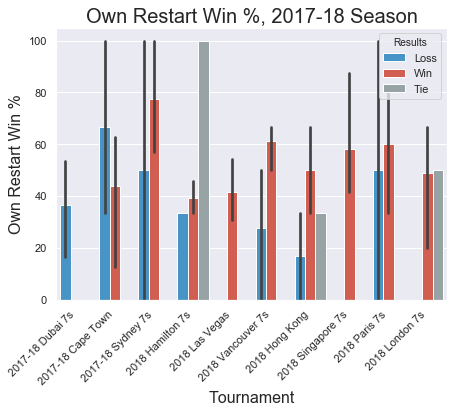

In [247]:
# Create a barplot of Contestable_Restart_Win_Pct across the season

sns.set(style="whitegrid")
# set figure size
sns.set(rc={'figure.figsize':(7,5)})
# set color palette 
flatui = ["#3498db", "#e74c3c", "#95a5a6"]
sns.set_palette(flatui)

# rotate and right align tournament labels
plt.xticks(rotation=45, ha='right')
# set plot and plot parameters
ax = sns.barplot(x='Tournament', y='Contestable_Restart_Win_Pct', hue='Results', data=impt_feat)
ax.axes.set_title("Own Restart Win %, 2017-18 Season",fontsize=20)
ax.set_xlabel('Tournament',fontsize=16)
ax.set_ylabel('Own Restart Win %',fontsize=16)

plt.show()

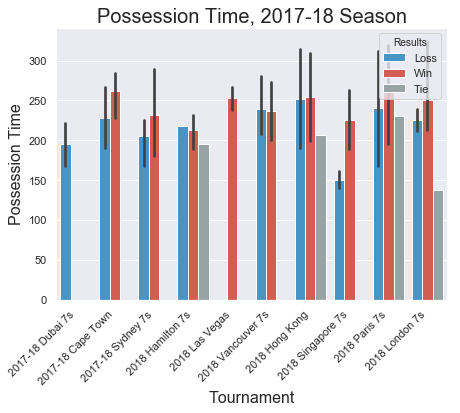

In [248]:
# Create a barplot of Possession Time across the season

sns.set(style="whitegrid")
# set figure size
sns.set(rc={'figure.figsize':(7,5)})
# set color palette 
flatui = ["#3498db", "#e74c3c", "#95a5a6"]
sns.set_palette(flatui)

# rotate and right align tournament labels
plt.xticks(rotation=45, ha='right')
# set plot and plot parameters
ax = sns.barplot(x='Tournament', y='Possession Time', hue='Results', data=impt_feat) 
ax.axes.set_title("Possession Time, 2017-18 Season",fontsize=20)
ax.set_xlabel('Tournament',fontsize=16)
ax.set_ylabel('Possession Time',fontsize=16)

plt.show()

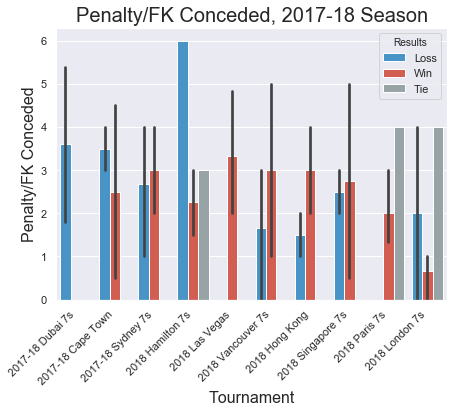

In [249]:
# Create a barplot of Penalty/FK Conceded across the season

sns.set(style="whitegrid")
# set figure size
sns.set(rc={'figure.figsize':(7,5)})
# set color palette 
flatui = ["#3498db", "#e74c3c", "#95a5a6"]
sns.set_palette(flatui)

# rotate and right align tournament labels
plt.xticks(rotation=45, ha='right')

# set plot and plot parameters
ax = sns.barplot(x='Tournament', y='Penalty/FK Conceded', hue='Results', data=impt_feat)
ax.axes.set_title("Penalty/FK Conceded, 2017-18 Season",fontsize=20)
ax.set_xlabel('Tournament',fontsize=16)
ax.set_ylabel('Penalty/FK Conceded',fontsize=16)

plt.show()

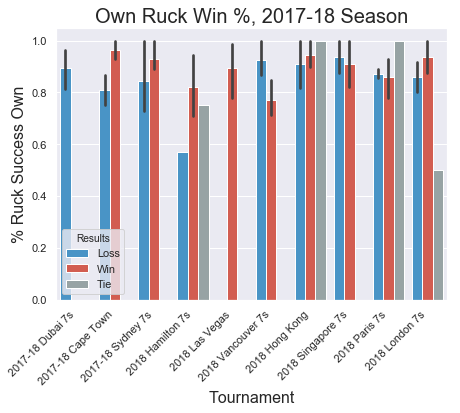

In [250]:
# Create a barplot of '% Ruck Success Own' across the season

sns.set(style="whitegrid")
# set figure size
sns.set(rc={'figure.figsize':(7,5)})
# set color palette 
flatui = ["#3498db", "#e74c3c", "#95a5a6"]
sns.set_palette(flatui)

# rotate and right align tournament labels
plt.xticks(rotation=45, ha='right')
# set plot and plot parameters
ax = sns.barplot(x='Tournament', y='% Ruck Success Own', hue='Results', data=impt_feat) 
ax.axes.set_title("Own Ruck Win %, 2017-18 Season",fontsize=20)
ax.set_xlabel('Tournament',fontsize=16)
ax.set_ylabel('% Ruck Success Own',fontsize=16)

plt.show()

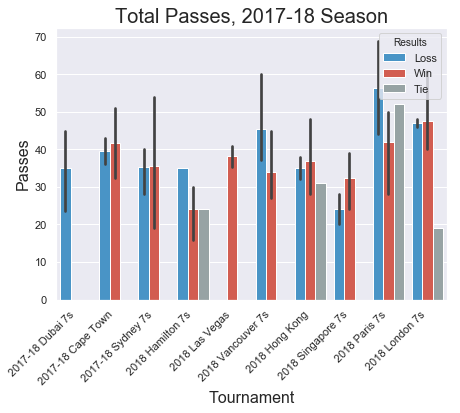

In [251]:
# Create a barplot of 'Passes' across the season

sns.set(style="whitegrid")
# set figure size
sns.set(rc={'figure.figsize':(7,5)})
# set color palette 
flatui = ["#3498db", "#e74c3c", "#95a5a6"]
sns.set_palette(flatui)

# rotate and right align tournament labels
plt.xticks(rotation=45, ha='right')
# set plot and plot parameters
ax = sns.barplot(x='Tournament', y='Passes', hue='Results', data=impt_feat) #
ax.axes.set_title("Total Passes, 2017-18 Season",fontsize=20)
ax.set_xlabel('Tournament',fontsize=16)
ax.set_ylabel('Passes',fontsize=16)

plt.show()

## Important Features Trends
Plotting the trends of important features across the entire season does not reveal many obvious insights.  Two areas that stand out are Passes and Contestable Restart Win Percentage.  The "Passes per game" metric appears counterintuitive, as the USA frequently had more passes in lost matches, when one would expect to have more passes in wins.  

There is some evidence of a pattern of higher Contestable Restart Win Percentage in wins than in losses.  We'll look at this feature a bit closer.


## Contestable Restart Win Percentage
Let's dig a little deeper into the Contestable Restart Win Percentage ('Contestable_Restart_Win_Pct'), starting with the descriptive statistics for this feature.

In [252]:
print(impt_feat['Contestable_Restart_Win_Pct'].describe())

count     59.000000
mean      44.188862
std       29.540792
min        0.000000
25%       33.333333
50%       50.000000
75%       66.666667
max      100.000000
Name: Contestable_Restart_Win_Pct, dtype: float64


The descriptive statistics tell us that the mean Contestable Restart Win Percentage is 44%. Let's look at the distribution of Contestable Restart Win Percentage across all matches.

Text(0.5, 1.0, 'Own Restart Win %, 2017-18 Season')

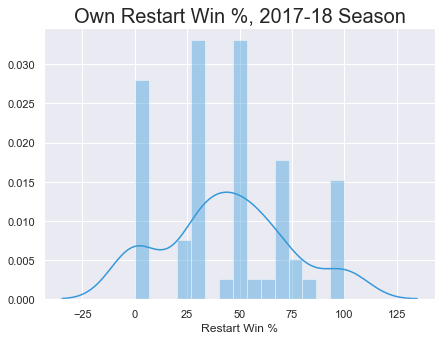

In [368]:
x = pd.Series(impt_feat['Contestable_Restart_Win_Pct'], name="Restart Win %")
ax = sns.distplot(x, kde=True, bins=15)
ax.axes.set_title("Own Restart Win %, 2017-18 Season",fontsize=20)

Text(0.5, 1.0, 'Own Restart Win % in USA Wins, 2017-18 Season')

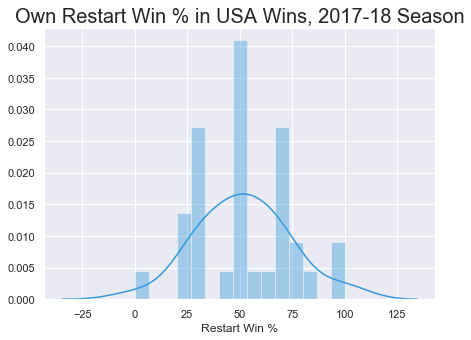

In [293]:
# Distribution of Contestable Restart Win% in USA Wins
x = pd.Series(w_impt_feat['Contestable_Restart_Win_Pct'], name="Restart Win %")
ax = sns.distplot(x, kde=True, bins=15)
ax.axes.set_title("Own Restart Win % in USA Wins, 2017-18 Season",fontsize=20)

Text(0.5, 1.0, 'Own Restart Win % in USA Losses, 2017-18 Season')

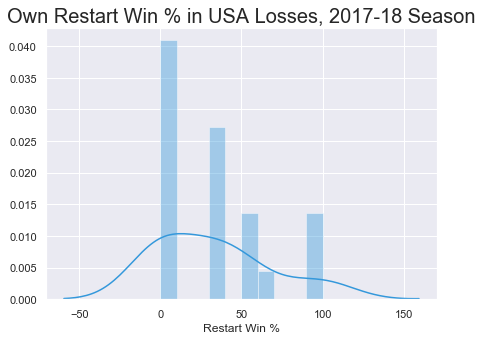

In [301]:
# Distribution of Contestable Restart Win% in USA Losses
x = pd.Series(l_impt_feat['Contestable_Restart_Win_Pct'], name="Restart Win %")
ax = sns.distplot(x, kde=True, bins=10)
ax.axes.set_title("Own Restart Win % in USA Losses, 2017-18 Season",fontsize=20)

In [369]:
print("Contestable Restart Win% in USA Wins")
print(usa_w['Contestable_Restart_Win_Pct'].describe())

Contestable Restart Win% in USA Wins
count     33.000000
mean      51.731602
std       21.855638
min        0.000000
25%       33.333333
50%       50.000000
75%       66.666667
max      100.000000
Name: Contestable_Restart_Win_Pct, dtype: float64


In [370]:
print("Contestable Restart Win% in USA Losses")
print(usa_l['Contestable_Restart_Win_Pct'].describe())

Contestable Restart Win% in USA Losses
count     22.000000
mean      32.575758
std       34.685767
min        0.000000
25%        0.000000
50%       33.333333
75%       50.000000
max      100.000000
Name: Contestable_Restart_Win_Pct, dtype: float64


In [312]:
# Look at numerical distribution of Restart Win % overall and in USA Wins
#print ("All USA matches:")
#print(usa.groupby('Contestable_Restart_Win_Pct')['MatchID'].nunique())
#print("\n")
#print ("All USA wins:")
#print(usa_w.groupby('Contestable_Restart_Win_Pct')['MatchID'].nunique())
#print("\n")
#print ("All USA losses:")
#print(usa_l.groupby('Contestable_Restart_Win_Pct')['MatchID'].nunique())

The distribution of Contestable Restart Win Percentage in USA wins is more tightly clustered around the mean of 51.73%, between 33% and 66%.  

The distribution of Contestable Restart Win Percentage in USA losses skews towards the left (low) side of the distribution.

It appears that there is clearly a relationship between the USA winning their own restarts and winning matches.

The fact that the Contestable Restart Win Percentage appears to be a key factor in USA wins is not surprising, as winning their own restarts is a hallmark of the USA game, and often leads to higher time of possession. Kickoffs/restarts are how the game is restarted after a score, with the scoring team kicking.  So, if a team has possession, scores, kicks off and regains their own kick, they will typically have long periods of possession.  

In the context of a match, if a team wins between one-third and two thirds of their own kickoffs/restarts, the resulting posessions will often translate into additional points, as well as depriving the opposition of the ball.

## Anomaly Detection
Let's also take a look at anomalies among the important features, using the outliers in boxplots to identify the anomalies.

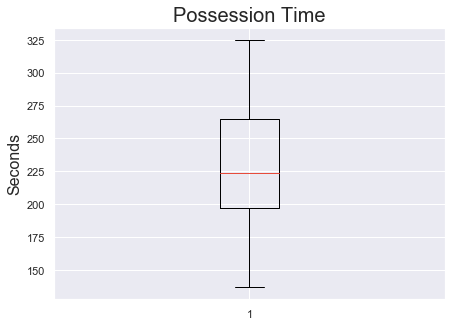

In [256]:
# 'Possession Time'
green_diamond = dict(markerfacecolor='g', marker='D')
fig3, ax3 = plt.subplots()
ax3.set_title('Possession Time',fontsize=20)
ax3.set_ylabel('Seconds',fontsize=16)
ax3.boxplot(usa['Possession Time'], flierprops=green_diamond)
plt.show()

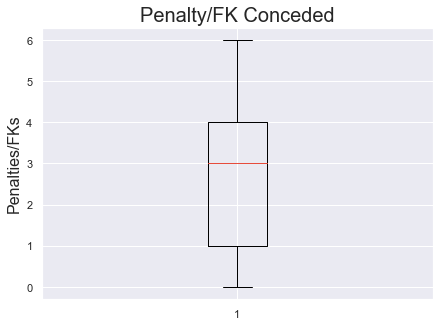

In [257]:
# 'Penalty/FK Conceded'
green_diamond = dict(markerfacecolor='g', marker='D')
fig3, ax3 = plt.subplots()
ax3.set_title('Penalty/FK Conceded', fontsize=20)
ax3.set_ylabel('Penalties/FKs',fontsize=16)
ax3.boxplot(usa['Penalty/FK Conceded'], flierprops=green_diamond)
plt.show()

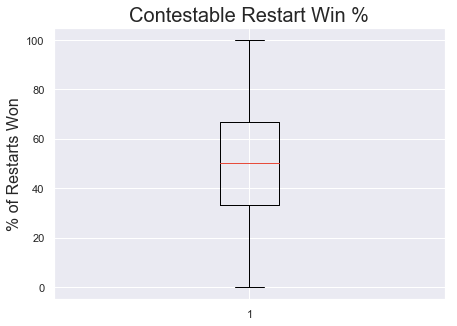

In [258]:
# 'Contestable_Restart_Win_Pct'
green_diamond = dict(markerfacecolor='g', marker='D')
fig3, ax3 = plt.subplots()
ax3.set_title('Contestable Restart Win %', fontsize=20)
ax3.set_ylabel('% of Restarts Won',fontsize=16)
ax3.boxplot(usa['Contestable_Restart_Win_Pct'], flierprops=green_diamond)
plt.show()

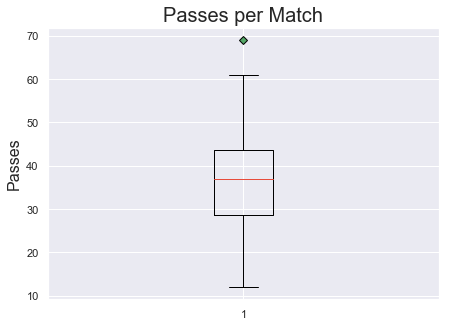

In [259]:
# 'Passes'
green_diamond = dict(markerfacecolor='g', marker='D')
fig3, ax3 = plt.subplots()
ax3.set_title('Passes per Match', fontsize=20)
ax3.set_ylabel('Passes',fontsize=16)
ax3.boxplot(usa['Passes'], flierprops=green_diamond)
plt.show()

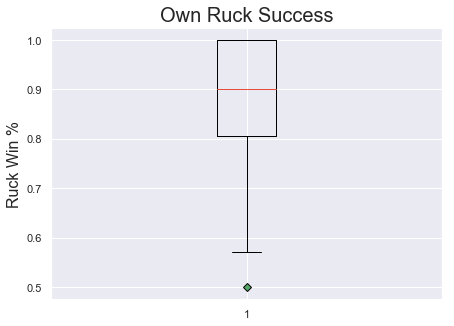

In [260]:
#ax = sns.boxplot(y='Possession Time', fliersize=.60, data=usa)
green_diamond = dict(markerfacecolor='g', marker='D')
fig3, ax3 = plt.subplots()
ax3.set_title('Own Ruck Success', fontsize=20)
ax3.set_ylabel('Ruck Win %',fontsize=16)
ax3.boxplot(usa['% Ruck Success Own'], flierprops=green_diamond)
plt.show()

## Own Ruck Success and Passes Outliers/Anomalies
Looking at the boxplots for the important features, we see that the '% Ruck Success Own' feature, the USA's 50% win percentage, and the 69 passes in the 'Passes' feature were both outside 1.5 of the Interquartile Range.

The instance of the Passes anomaly occurred in a match against New Zealand	in the 2018 Paris 7s, which resulted in a loss.

The anomaly of the 50% win of their own rucks ocurred in a match against Kenya in the 2018 London 7s, which resulted in a rare tie.

Below is further information on the matches in which the outliers were found.

In [261]:
# usa_w = df[(df['Team'] == 'USA') & (df['Result'] == 1)]
# find match where the USA had an outlier of 50% own rate in their own rucks 
print("Ruck Win % Outlier")
outlier_ruck = usa.loc[usa['% Ruck Success Own'] == .50]
outlier_ruck[['Team', 'Opposition', 'Date', 'Tournament', '% Ruck Success Own','Result']]

Ruck Win % Outlier


,Team,Opposition,Date,Tournament,% Ruck Success Own,Result
116,USA,Kenya,6/3/18,2018 London 7s,0.5,2


In [262]:
# find match where the USA had an outlier of 69 passes
print("Pass Outlier")
outlier_pass = usa.loc[usa['Passes'] == 69]
outlier_pass[['Team', 'Opposition', 'Date', 'Tournament', 'Passes','Result']]

Pass Outlier


,Team,Opposition,Date,Tournament,Passes,Result
104,USA,New Zealand,5/27/18,2018 Paris 7s,69,0


## Visualizing Important Features in USA Wins and Losses

We will now visualize the differences in in Possession Time and Contestable Restart Win Percentage in wins and losses, to see if it provides any more insight.

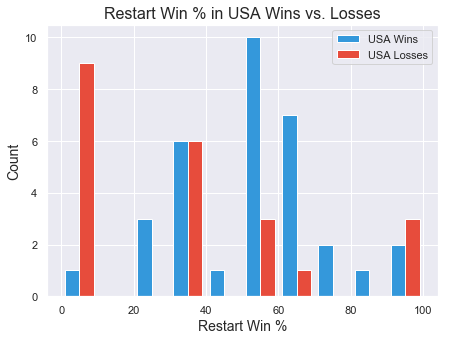

In [268]:
# Create a histogram of Contestable_Restart_Win_Pct
matplotlib.cm.get_cmap(name='seismic')
wins = usa_w['Contestable_Restart_Win_Pct']
losses = usa_l['Contestable_Restart_Win_Pct']
legend = ['USA Wins', 'USA Losses']
plt.hist([wins, losses], bins=10)
plt.ylabel('Count',fontsize=14)
plt.xlabel('Restart Win %',fontsize=14)
plt.legend(legend)
plt.title('Restart Win % in USA Wins vs. Losses',fontsize=16)
plt.show()

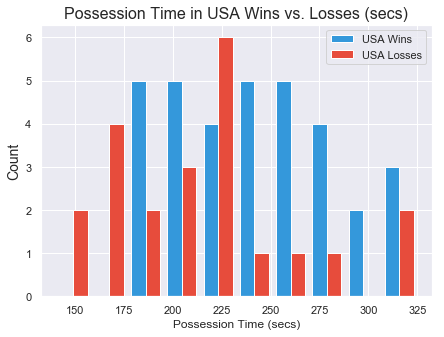

In [269]:
#Possession Time
matplotlib.cm.get_cmap(name='seismic')
poss_wins = usa_w['Possession Time']
poss_losses = usa_l['Possession Time']
legend = ['USA Wins', 'USA Losses']
plt.hist([poss_wins, poss_losses], bins=10)
plt.ylabel('Count',fontsize=14)
plt.xlabel('Possession Time (secs)')
plt.legend(legend)
plt.title('Possession Time in USA Wins vs. Losses (secs)',fontsize=16)
plt.show()

We can see further evidence that, roughly, as the USA wins greater than 40% of their own restarts, they tend to win their matches. The mean win percentage for their Own Restarts was 44.2%.

Additionally, when the USA has possession for more than 3 minutes (180 seconds), they also have greater success, although there is a strange occurrence of losses at 3 min 45 seconds (225 seconds). The mean Possession time for all USA matches was 229 seconds.

## Plotting relationships between Important Features

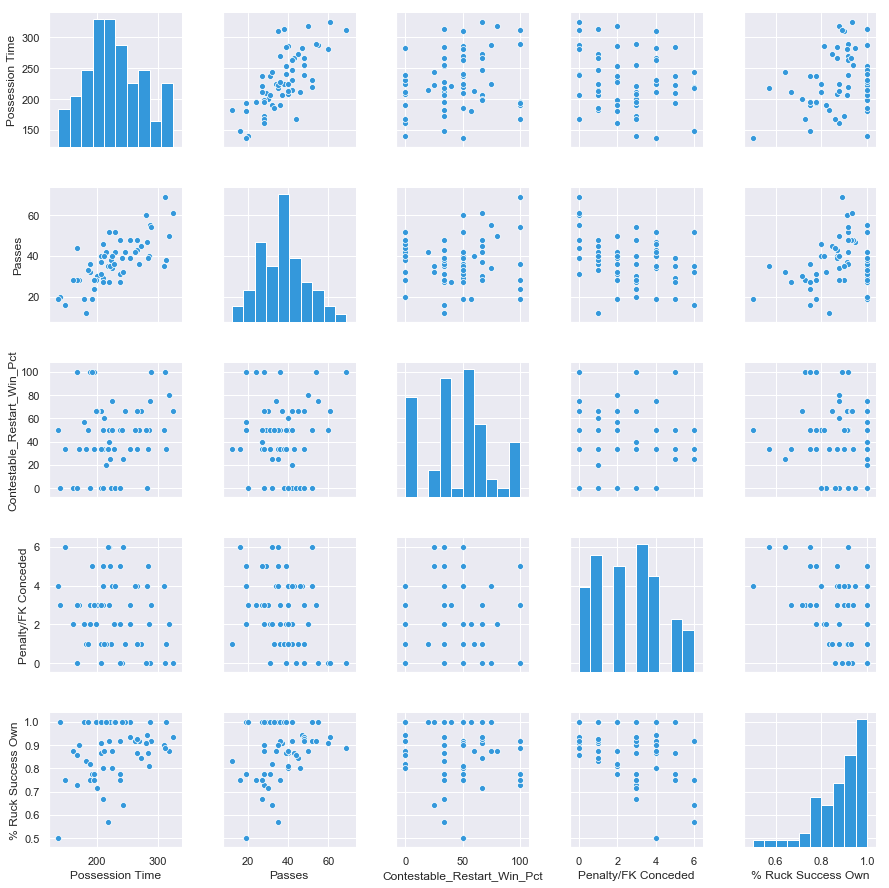

In [270]:
sns.pairplot(impt_feat,  palette='Set1') #hue='Result',
plt.show()

## Important Feature Correlation
Looking at the shape of the scatterplots, it looks like only Possession Time and Passes are correlated.  Let's look at the strength of this correlation.

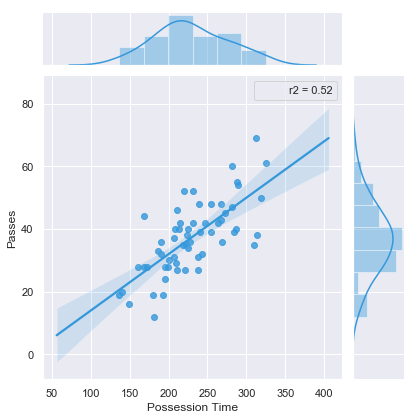

In [271]:
#Plot relationship between Poss Time Diff and Passes
# add Pearson's R value
from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
#sns.jointplot(x, y, kind="reg", stat_func=r2)

sns.jointplot(x='Possession Time', y='Passes', data=impt_feat, kind="reg", stat_func=r2);

The correlation between Possession Time and Passes has a Pearson's R of 0.52, which makes intuitive sense - the longer a team has the ball, the more passes they are likely to make.

## Important Feature Performance in 2018-19 Series
We will now see how the USA performed in the important features in the first two tournaments of the 2018-19 World Series. How did the USA perform in the 'important features' in Dubai and Cape Town, and did these features have an impact on the USA's wins and losses?

In [373]:
# Load 2018-19 data set
df2 = pd.read_csv('data/2018-19_Excel_FinalDF_matches.csv')

In [273]:
#df2

In [274]:
# Conduct some data wrangling - strip extra characters out of Tournament names, and create a column for Wins and Losses
# Strip underscores from tournament name for better looking labels
df2['Tournament'] = df2['Tournament'].str.replace("_"," ")

In [275]:
#Create a Result column for Win/Loss.

#Temp DF to hold 'Result'
sub = pd.DataFrame(columns=['Result'])

#Iterate through rows and create 'Result' for Win/Loss (Win=1, Win=0)
for index, row in df2.iterrows():
    if index%2 == 0:
        new_row = df2.iloc[index+1]
        if row['MatchID'] == new_row['MatchID']:
            if row['Scores'] > new_row['Scores']:
                result1 = row['Result'] = 1
                result2 = new_row['Result'] = 0
            elif row['Scores'] < new_row['Scores']:
                result1 = row['Result'] = 0
                result2 = new_row['Result'] = 1
            else:
                result1 = row['Result'] = 2
                result2 = new_row['Result'] = 2

            sub.loc[index] = (result1)
            sub.loc[index+1]  = (result2)

df2 = pd.concat([df2, sub], axis=1)

In [276]:
# sort dataframe by Tournament, then by MatchID
df2 = df2.sort_values(by=['Tournament', 'MatchID'])

#subset df for only USA matches
usa_19 = df2[(df2['Team'] == 'USA')]

# df subset containing only the important features
impt_feat2 = usa_19[['MatchID','Opposition','Tournament', 'Possession Time', 'Passes', 'Contestable_Restart_Win_Pct','Penalty/FK Conceded', 
                '% Ruck Success Own', 'Result']]
impt_feat2

,MatchID,Opposition,Tournament,Possession Time,Passes,Contestable_Restart_Win_Pct,Penalty/FK Conceded,% Ruck Success Own,Result
0,1,Argentina,2019 Cape Town,171,19,20.000000,2,100,1
4,3,England,2019 Cape Town,150,22,33.333333,1,100,1
6,4,Fiji,2019 Cape Town,325,51,50.000000,2,75,1
11,6,Japan,2019 Cape Town,268,35,42.857143,3,100,1
13,7,New Zealand,2019 Cape Town,272,42,20.000000,1,93,1
19,10,Spain,2019 Cape Town,245,35,40.000000,0,89,1
2,2,Australia,2019 Dubai 7s,215,43,25.000000,4,83,1
8,5,Fiji,2019 Dubai 7s,315,63,75.000000,1,100,0
15,8,New Zealand,2019 Dubai 7s,230,55,50.000000,4,89,0
17,9,New Zealand,2019 Dubai 7s,202,45,0.000000,3,88,0


In [277]:
#Subset USA Wins
usa19_w = impt_feat2[(impt_feat2['Result'] == 1)]
#Subset USA Losses
usa19_l = impt_feat2[(impt_feat2['Result'] == 0)]

## Examining Means of Dubai & Cape Town Important Features
Let's look at the means of important features in wins, losses, and overall.

In [319]:
#w_impt_feat = usa19_w[['Possession Time', 'Passes', 'Contestable_Restart_Win_Pct','Penalty/FK Conceded', 
#                '% Ruck Success Own']]
#print('Important Feature Means in USA Wins')
win_avg_19 = usa19_w.agg(['mean'])
win_avg_19['Results'] = pd.Series(("Wins"), index=win_avg_19.index)
#win_avg_19

In [318]:
# USA losses
#l_impt_feat = usa_l[['Possession Time', 'Passes', 'Contestable_Restart_Win_Pct','Penalty/FK Conceded', 
#                '% Ruck Success Own']]
#print('Important Feature Means in USA Losses')
loss_avg_19 = usa19_l.agg(['mean'])
loss_avg_19['Results'] = pd.Series(("Losses"), index=loss_avg_19.index)
#loss_avg_19

In [317]:
# all USA matches
#all_avg = impt_feat2[['Possession Time', 'Passes', 'Contestable_Restart_Win_Pct','Penalty/FK Conceded', 
#                '% Ruck Success Own']]
#print('Important Feature Means in All USA Matches')
all_avg_19 = impt_feat2.agg(['mean'])
all_avg_19['Results'] = pd.Series(("All"), index=all_avg_19.index)
#all_avg_19

In [320]:
total_19 = all_avg_19.append(win_avg)
total_19 = total_19.append(loss_avg_19, ignore_index=True)
#total_19

In [316]:
# reorder columns, move 'Results' to first column
cols = total_19.columns.tolist()
cols = ['Results','Possession Time',
 'Passes',
 'Contestable_Restart_Win_Pct',
 'Penalty/FK Conceded',
 '% Ruck Success Own']
total_19 = total_19[cols]
total_19

,Results,Possession Time,Passes,Contestable_Restart_Win_Pct,Penalty/FK Conceded,% Ruck Success Own
0,All,220.583333,37.083333,31.765873,2.083333,84.750000
1,Wins,243.121212,36.757576,51.731602,2.575758,0.893474
2,Losses,249.000000,54.333333,41.666667,2.666667,92.333333


## Comparison: 2017-18 Season vs. Dubai and Cape Town, 2018-19
Interestingly, the USA's Dubai performance in the important features was counterintuitive.  The performed below the 2017-18 mean in every metric, except for "Passes," yet still made it to the Cup Final.  One highlight was the match against Fiji, the reigning Olympic Gold Medalists, in the Cup Quarterfinal where they held the ball for 5:15, made 63 passes, won 75% of their own restarts, won 100% of their own rucks, and conceded only one penalty/free kick.

In [285]:
print("2018-19 Descriptive Statistics")
impt_feat2.describe()

2018-19 Descriptive Statistics


,MatchID,Possession Time,Passes,Contestable_Restart_Win_Pct,Penalty/FK Conceded,% Ruck Success Own
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,6.500000,220.583333,37.083333,31.765873,2.083333,84.750000
std,3.605551,74.525723,16.378802,21.561745,1.240112,27.893059
min,1.000000,55.000000,5.000000,0.000000,0.000000,0.000000
25%,3.750000,192.000000,28.000000,20.000000,1.000000,86.750000
50%,6.500000,222.500000,38.500000,29.166667,2.000000,91.000000
75%,9.250000,269.000000,46.500000,44.642857,3.000000,100.000000
max,12.000000,325.000000,63.000000,75.000000,4.000000,100.000000


In [321]:
#impt_feat2[impt_feat2['Tournament'] == "2019 Cape Town"]

In [371]:
#print("USA - Dubai, 2018-19, Important Features")
#impt_feat2

In [288]:
total_18 = total[0:1]
tot_19 = total_19[0:1]
compar = total_18.append(tot_19)
compar['Season'] = pd.Series(("2018", "2019"), index=compar.index)
cols = ['Season','Results','Possession Time','Passes','Contestable_Restart_Win_Pct','Penalty/FK Conceded','% Ruck Success Own']
compar = compar[cols]
print("Comparison of Important Feature Means, 2017-18 vs Dubai 2018-19")
compar

Comparison of Important Feature Means, 2017-18 vs Dubai 2018-19


,Season,Results,Possession Time,Passes,Contestable_Restart_Win_Pct,Penalty/FK Conceded,% Ruck Success Own
0,2018,All,229.084746,37.203390,44.188862,2.576271,0.878939
0,2019,All,220.583333,37.083333,31.765873,2.083333,84.750000


In [372]:
# df2
df2 = df2.sort_values(by=['Tournament', 'MatchID'])
df2 = df2.reset_index(drop=True)
#df2

In Dubai, the USA performed well overall, losing only two matches - both to New Zealand.  The first loss was in a pool match and the second loss was in the Cup Final, losing 21-5.

### Dubai Pool Match, 24-7 Loss to NZ
In the pool match, New Zealand outperformed the USA in nearly ever area, except for "% Ruck Success Own" and "Penalty/FK Conceded".

In [362]:
# Get the match data for the USA v NZ pool match
df2.iloc[[17, 19]] 

,Team,Opposition,MatchID,TotalPoints,Tournament,Conversions,Contestable_Restart_Win_Pct,Lineout_Win_Pct,Scrum_Win_Pct,Scores,Tries,Possession Time,Passes,Rucks Attack,% Ruck Success Own,T-Overs Won,Penalty/FK Conceded,Ruck_Maul,Yellow_Red Cards,Result
17,NEW ZEALAND,USA,8,31,2019 Dubai 7s,0.5,0.0,1.0,1,24,4,276,54,19,84,5,6,4,1,1
19,USA,New Zealand,9,31,2019 Dubai 7s,1.0,0.0,1.0,0,7,1,202,45,8,88,3,3,1,1,0


### Dubai Cup Final, 21-5 Loss to NZ
Looking at the results from the Cup Final provides some insight into the sometimes maddening nature of Rugby 7s.  The USA outperformed New Zealand in nearly every statistical category.  However, one stat stands out where New Zealand outperformed the USA - in Turnovers Won.  New Zealand turned the USA's possession over six times the USA's three.

In [363]:
# Get the match data for the USA v NZ Dubai Cup Final
df2.iloc[[16, 18]] 

,Team,Opposition,MatchID,TotalPoints,Tournament,Conversions,Contestable_Restart_Win_Pct,Lineout_Win_Pct,Scrum_Win_Pct,Scores,Tries,Possession Time,Passes,Rucks Attack,% Ruck Success Own,T-Overs Won,Penalty/FK Conceded,Ruck_Maul,Yellow_Red Cards,Result
16,NEW ZEALAND,USA,7,26,2019 Dubai 7s,1.0,0.0,0.5,1,21,3,212,31,8,75,6,4,2,1,0
18,USA,New Zealand,8,26,2019 Dubai 7s,0.0,50.0,1.0,1,5,1,230,55,9,89,3,4,2,0,0


## Cape Town Cup Semi-Final, 31-12 Win over New Zealand
In Cape Town, the USA reversed it's results from the previous week, beating New Zealand in the Semi-Final and losing to Fiji in the Final.

In the Semi-Final, the USA beat New Zealand compreshensively, both on the scoreboard and in the metrics.  The USA only won 20% of their own Restarts, but still dominated, with nearly double the time of possession.

In [327]:
df2[8:10]

,Team,Opposition,MatchID,TotalPoints,Tournament,Conversions,Contestable_Restart_Win_Pct,Lineout_Win_Pct,Scrum_Win_Pct,Scores,Tries,Possession Time,Passes,Rucks Attack,% Ruck Success Own,T-Overs Won,Penalty/FK Conceded,Ruck_Maul,Yellow_Red Cards,Result
13,USA,New Zealand,7,43,2019 Cape Town,0.6,20.0,1.0,1,31,5,272,42,14,93,5,1,1,0,1
16,New Zealand,USA,9,43,2019 Cape Town,0.5,0.0,0.0,0,12,2,148,27,8,63,3,6,3,0,1


## Cape Town Cup Final, 29-15 Loss to Fiji
In the Cup Final against Fiji, once again the match metrics didn't quite tell the full story.  The USA won 50% of their own REstarts, which is usually a good indicator of a winning performance, and nearly doubled Fiji's time of possession. The one area that stands out is the USA winning only 75% of their rucks.

Having watched the match, Fiji outscored the USA 5 tries to 3, but two of the USA's tries came late in the match, after it was effectively over.

One additional note is that Fiji is well-known as a "quick strike" team, and does not neccessarily need to dominate the time of possesssion to win, as other teams do.

In [326]:
df2[4:6]

,Team,Opposition,MatchID,TotalPoints,Tournament,Conversions,Contestable_Restart_Win_Pct,Lineout_Win_Pct,Scrum_Win_Pct,Scores,Tries,Possession Time,Passes,Rucks Attack,% Ruck Success Own,T-Overs Won,Penalty/FK Conceded,Ruck_Maul,Yellow_Red Cards,Result
6,USA,Fiji,4,44,2019 Cape Town,0.0,50.0,1.000000,1,15,3,325,51,12,75,5,2,2,1,1
9,Fiji,USA,5,44,2019 Cape Town,0.4,0.0,0.666667,1,29,5,178,17,5,80,6,3,0,0,1


## Conclusion
In the course of this analysis, it has become clear that, while feature importance is a crucial tool in model evaluation, in this analysis it is not neccessarily a reliable predictor of a match's outcome - not in individual matches, nor in macro-level metrics for the entire season.  

The 'Contestable_Restart_Win_Pct' feature does appear to be a strong indicator when looking at macro-level performance across a Series, but it appears that the game of Rugby 7s is too volatile to be able to develop strong and accurate predictors at the match level. 

This volatility is best illustrated in the USA's recent loss to New Zealand in Dubai, where they outperformed New Zealand in nearly every metric, but were still beaten  soundly, as well as the same situation in the Cape Town Cup Final against Fiji.